In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

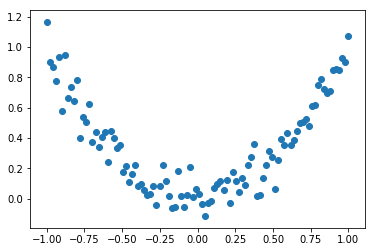

In [3]:
x = np.linspace(-1, 1, 100)[:,np.newaxis]
noise = np.random.normal(0, 0.1, size = x.shape)
y = np.power(x, 2) + noise

plt.scatter(x, y)
plt.show()

In [4]:
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.float32, y.shape)

In [5]:
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)
output = tf.layers.dense(l1, 1)

In [6]:
print(tf_y.shape)

(100, 1)


In [7]:
loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Text(0.5, 0, 'Loss=0.0091')

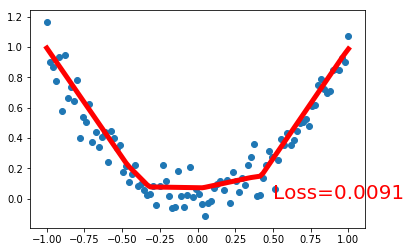

In [10]:
for step in range(500):
    sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
_, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
plt.cla()
plt.scatter(x, y)
plt.plot(x, pred, 'red', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})